In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tqdm import tqdm
import numpy as np
from math import comb
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
# Define dataset directories
base_dir = r"E:\marine-animals-dataset\versions\1"

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1241 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [4]:
# Print class indices
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Load VGG16 model without top layers for feature extraction
vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=vgg16_base.input, outputs=vgg16_base.get_layer("block5_pool").output)

Class indices: {'Dolphin': 0, 'Fish': 1, 'Lobster': 2, 'Octopus': 3, 'Sea Horse': 4}


In [5]:
# Feature extraction with Global Average Pooling (GAP)
def extract_features_with_gap(generator, model):
    features = []
    labels = []
    for inputs_batch, labels_batch in tqdm(generator, desc="Extracting Features"):
        batch_features = model.predict(inputs_batch)
        batch_features = np.mean(batch_features, axis=(1, 2))  # Global Average Pooling
        features.append(batch_features)
        labels.append(labels_batch)
        if len(features) >= len(generator):  # Stop after one epoch
            break
    return np.vstack(features), np.vstack(labels)

In [6]:
# Extract features for training and validation datasets
train_features, train_labels = extract_features_with_gap(train_generator, model)
valid_features, valid_labels = extract_features_with_gap(valid_generator, model)

Extracting Features:   0%|                                                                               | 0/39 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:   3%|█▊                                                                     | 1/39 [00:03<02:05,  3.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:   5%|███▋                                                                   | 2/39 [00:05<01:46,  2.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:   8%|█████▍                                                                 | 3/39 [00:08<01:39,  2.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  10%|███████▎                                                               | 4/39 [00:11<01:33,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  13%|█████████                                                              | 5/39 [00:13<01:31,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  15%|██████████▉                                                            | 6/39 [00:16<01:27,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  18%|████████████▋                                                          | 7/39 [00:18<01:23,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  21%|██████████████▌                                                        | 8/39 [00:21<01:21,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  23%|████████████████▍                                                      | 9/39 [00:24<01:19,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  26%|█████████████████▉                                                    | 10/39 [00:26<01:14,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  28%|███████████████████▋                                                  | 11/39 [00:29<01:11,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  31%|█████████████████████▌                                                | 12/39 [00:31<01:09,  2.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  33%|███████████████████████▎                                              | 13/39 [00:34<01:05,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  36%|█████████████████████████▏                                            | 14/39 [00:36<01:03,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  38%|██████████████████████████▉                                           | 15/39 [00:39<01:01,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  41%|████████████████████████████▋                                         | 16/39 [00:42<00:59,  2.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  44%|██████████████████████████████▌                                       | 17/39 [00:44<00:57,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  46%|████████████████████████████████▎                                     | 18/39 [00:47<00:53,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  49%|██████████████████████████████████                                    | 19/39 [00:49<00:48,  2.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  51%|███████████████████████████████████▉                                  | 20/39 [00:51<00:45,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  54%|█████████████████████████████████████▋                                | 21/39 [00:53<00:41,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  56%|███████████████████████████████████████▍                              | 22/39 [00:55<00:38,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  59%|█████████████████████████████████████████▎                            | 23/39 [00:58<00:35,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  62%|███████████████████████████████████████████                           | 24/39 [01:00<00:33,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  64%|████████████████████████████████████████████▊                         | 25/39 [01:02<00:30,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  67%|██████████████████████████████████████████████▋                       | 26/39 [01:04<00:29,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  69%|████████████████████████████████████████████████▍                     | 27/39 [01:06<00:26,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  72%|██████████████████████████████████████████████████▎                   | 28/39 [01:09<00:24,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  74%|████████████████████████████████████████████████████                  | 29/39 [01:11<00:22,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  77%|█████████████████████████████████████████████████████▊                | 30/39 [01:13<00:19,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  79%|███████████████████████████████████████████████████████▋              | 31/39 [01:15<00:17,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  82%|█████████████████████████████████████████████████████████▍            | 32/39 [01:17<00:15,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  85%|███████████████████████████████████████████████████████████▏          | 33/39 [01:20<00:13,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  87%|█████████████████████████████████████████████████████████████         | 34/39 [01:22<00:10,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  90%|██████████████████████████████████████████████████████████████▊       | 35/39 [01:24<00:08,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  92%|████████████████████████████████████████████████████████████████▌     | 36/39 [01:26<00:06,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  95%|██████████████████████████████████████████████████████████████████▍   | 37/39 [01:28<00:04,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  97%|████████████████████████████████████████████████████████████████████▏ | 38/39 [01:31<00:02,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting Features:   0%|                                                                                | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  12%|█████████                                                               | 1/8 [00:02<00:14,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  25%|██████████████████                                                      | 2/8 [00:04<00:12,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  38%|███████████████████████████                                             | 3/8 [00:06<00:10,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  50%|████████████████████████████████████                                    | 4/8 [00:08<00:08,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  62%|█████████████████████████████████████████████                           | 5/8 [00:10<00:06,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  75%|██████████████████████████████████████████████████████                  | 6/8 [00:12<00:04,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  88%|███████████████████████████████████████████████████████████████         | 7/8 [00:15<00:02,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting Features:  88%|███████████████████████████████████████████████████████████████         | 7/8 [00:17<00:02,  2.48s/it]


In [26]:
# Combine train and validation data for clustering
all_features = np.vstack((train_features, valid_features))
all_labels = np.argmax(np.vstack((train_labels, valid_labels)), axis=1)

In [ ]:
# ---------- PCA ----------
def pca_scratch(X, n_components):
    # Step 1: Center the data (subtract mean)
    X_centered = X - np.mean(X, axis=0)
    
    # Step 2: Compute covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Step 3: Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues & eigenvectors (descending order)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    # Step 5: Select top n_components
    eigenvectors = eigenvectors[:, :n_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(X_centered, eigenvectors)
    
    return X_reduced, eigenvalues[:n_components], eigenvectors

reduced_features, eig_vals, eig_vecs = pca_scratch(all_features, n_components=50)

print("Reduced shape:", reduced_features.shape)

Reduced shape: (1491, 50)


In [ ]:
import numpy as np

# ----------------- KMeans -----------------
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iters=300, n_init=10, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _init_centroids_kmeanspp(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        
        centroids = []
        # 1. Choose first centroid randomly
        first_idx = np.random.randint(n_samples)
        centroids.append(X[first_idx])
        
        # 2. Choose remaining centroids
        for _ in range(1, self.n_clusters):
            # Compute distances to nearest centroid
            dist_sq = np.min([np.sum((X - c) ** 2, axis=1) for c in centroids], axis=0)
            probs = dist_sq / np.sum(dist_sq)
            next_idx = np.random.choice(n_samples, p=probs)
            centroids.append(X[next_idx])
        
        return np.array(centroids)

    def fit(self, X):
        best_inertia = float("inf")
        best_centroids = None
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._init_centroids_kmeanspp(X)
            for _ in range(self.max_iters):
                # Assign points to nearest centroid
                distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)

                # Compute new centroids
                new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
                                          for j in range(self.n_clusters)])

                # Stop if converged
                if np.allclose(centroids, new_centroids, atol=1e-6):
                    break
                centroids = new_centroids

            # Compute inertia (sum of squared distances)
            inertia = np.sum((X - centroids[labels]) ** 2)

            # Keep the best run
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids
                best_labels = labels

        self.centroids = best_centroids
        self.labels_ = best_labels
        return self

num_clusters = len(class_indices)  # number of classes

kmeans = KMeansScratch(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_features)

cluster_labels = kmeans.labels_
centroids = kmeans.centroids

In [ ]:
# ---------- Adjusted Rand Index ----------
def adjusted_rand_index_scratch(labels_true, labels_pred):
    n = len(labels_true)
    contingency = {}
    
    # Build contingency table
    for i in range(n):
        contingency.setdefault(labels_true[i], {})
        contingency[labels_true[i]].setdefault(labels_pred[i], 0)
        contingency[labels_true[i]][labels_pred[i]] += 1
    
    # Row & column sums
    sum_comb_c = 0
    sum_comb_k = 0
    sum_comb = 0
    nC2 = comb(n, 2)
    
    for row in contingency.values():
        row_sum = sum(row.values())
        sum_comb_c += comb(row_sum, 2)
        for val in row.values():
            sum_comb += comb(val, 2)
    for j in set(labels_pred):
        col_sum = sum(contingency.get(i, {}).get(j, 0) for i in contingency)
        sum_comb_k += comb(col_sum, 2)
    
    expected_index = sum_comb_c * sum_comb_k / nC2
    max_index = (sum_comb_c + sum_comb_k) / 2
    return (sum_comb - expected_index) / (max_index - expected_index)

# ---------- Silhouette Score ----------
def silhouette_score_scratch(X, labels):
    n = len(X)
    unique_clusters = np.unique(labels)
    silhouettes = []
    
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == c] for c in unique_clusters if c != labels[i]]
        
        # a(i): average distance to same cluster
        a = np.mean([np.linalg.norm(X[i] - p) for p in same_cluster if not np.array_equal(p, X[i])]) if len(same_cluster) > 1 else 0
        
        # b(i): min average distance to other clusters
        b = np.min([np.mean([np.linalg.norm(X[i] - p) for p in cluster]) for cluster in other_clusters])
        
        silhouettes.append((b - a) / max(a, b))
    
    return np.mean(silhouettes)

# ---------- Evaluation ----------
ari_score = adjusted_rand_index_scratch(all_labels, cluster_labels)
silhouette_avg = silhouette_score_scratch(reduced_features, cluster_labels)

print(f"Adjusted Rand Index (scratch): {ari_score:.4f}")
print(f"Silhouette Score (scratch): {silhouette_avg:.4f}")

Adjusted Rand Index (scratch): 0.1291
Silhouette Score (scratch): 0.0766


In [ ]:
def silhouette_score_manual(X, labels):
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    distances = cdist(X, X, metric='euclidean')
    
    silhouettes = []
    for i in range(n_samples):
        own_cluster = labels[i]
        
        # Intra-cluster distances
        mask_same = labels == own_cluster
        a_i = np.mean(distances[i, mask_same][distances[i, mask_same] > 0]) if np.sum(mask_same) > 1 else 0
        
        # Nearest-cluster distance
        b_i = np.inf
        for lbl in unique_labels:
            if lbl == own_cluster:
                continue
            mask_other = labels == lbl
            b_i = min(b_i, np.mean(distances[i, mask_other]))
        
        # Silhouette for point i
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0
        silhouettes.append(s_i)
    
    return np.mean(silhouettes)

def calinski_harabasz_manual(X, labels):
    n_samples, n_features = X.shape
    unique_labels = np.unique(labels)
    k = len(unique_labels)

    overall_mean = np.mean(X, axis=0)

    # Between-cluster and within-cluster scatter
    B, W = 0, 0
    for lbl in unique_labels:
        cluster_points = X[labels == lbl]
        n_cluster = cluster_points.shape[0]
        cluster_mean = np.mean(cluster_points, axis=0)

        # Between-cluster
        B += n_cluster * np.sum((cluster_mean - overall_mean) ** 2)

        # Within-cluster
        W += np.sum((cluster_points - cluster_mean) ** 2)

    return (B / (k - 1)) / (W / (n_samples - k))


def davies_bouldin_manual(X, labels):
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    
    cluster_means = []
    S = []  # intra-cluster distances

    # Compute cluster means & intra-cluster scatter
    for lbl in unique_labels:
        cluster_points = X[labels == lbl]
        cluster_mean = np.mean(cluster_points, axis=0)
        cluster_means.append(cluster_mean)
        S.append(np.mean(np.linalg.norm(cluster_points - cluster_mean, axis=1)))
    
    cluster_means = np.array(cluster_means)
    S = np.array(S)

    # Compute DB index
    db_indexes = []
    for i in range(k):
        max_ratio = -np.inf
        for j in range(k):
            if i != j:
                M_ij = np.linalg.norm(cluster_means[i] - cluster_means[j])
                ratio = (S[i] + S[j]) / M_ij if M_ij > 0 else np.inf
                max_ratio = max(max_ratio, ratio)
        db_indexes.append(max_ratio)
    
    return np.mean(db_indexes)


# cluster_labels = labels from KMeans
silhouette_avg = silhouette_score_manual(reduced_features, cluster_labels)
calinski_harabasz = calinski_harabasz_manual(reduced_features, cluster_labels)
davies_bouldin = davies_bouldin_manual(reduced_features, cluster_labels)

print("Silhouette Score (manual):", silhouette_avg)
print("Calinski-Harabasz Score (manual):", calinski_harabasz)
print("Davies-Bouldin Index (manual):", davies_bouldin)

Silhouette Score (manual): 0.07658092088106433
Calinski-Harabasz Score (manual): 126.33997097212597
Davies-Bouldin Index (manual): 2.834556957468612


In [31]:
# Visualize clusters using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(reduced_features)

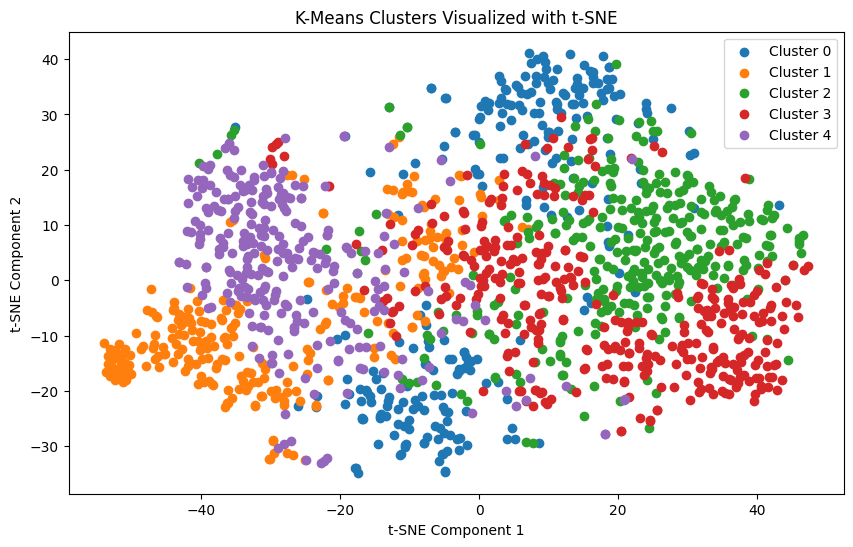

In [ ]:
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    indices = np.where(cluster_labels == cluster_id)
    plt.scatter(tsne_features[indices, 0], tsne_features[indices, 1], label=f"Cluster {cluster_id}")

plt.title("K-Means Clusters Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()